 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, will read the CSV files into DataFrames and perform any necessary data cleaning steps. 
After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
 #Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
whales_return_df = pd.read_csv(
    Path("./Resources/whale_returns.csv"), 
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)
whales_return_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
#Checking For Null Values in dataset 
whales_return_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
#Drop null values and save the dataframe with no null values 
whales_return_df=whales_return_df.dropna()
whales_return_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
#Read the csv file into dataframe and set date as index and date format 
algo_return_df = pd.read_csv(
    Path("./Resources/algo_returns.csv"), 
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)
algo_return_df.head()
algo_return_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [6]:
#Check data for null values 
algo_return_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [6]:
#drop null values and save the dataframe with no null values 
algo_return_df=algo_return_df.dropna()
algo_return_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [7]:
#S&P TSX 60 Returns
#Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data.

sp_return_df = pd.read_csv(
    Path("./Resources/sp_tsx_history.csv"), 
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)
sp_return_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [8]:
#data has 0 null values
sp_return_df.isnull().sum()

Close    0
dtype: int64

In [13]:
sp_return_df.dtypes

Close    object
dtype: object

In [9]:
#using lambda expression to remove '$' and ',' from the string in order to convert the Close cloumn to float 
sp_return_df['Close']=sp_return_df['Close'].apply(lambda x:str(x).replace('$','')if '$' in str(x) else str(x))
sp_return_df['Close']=sp_return_df['Close'].apply(lambda x:str(x).replace(',','')if ',' in str(x) else str(x))

In [10]:
sp_return_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [11]:
#change the cloumn Close type to float to apply returns calculations 
sp_return_df['Close']= (sp_return_df['Close']).astype(float)

In [45]:
sp_return_df.dtypes

Close    float64
dtype: object

In [12]:
## Calculate the daily return using the 'pct_change()' function
sp_return_df = sp_return_df.pct_change()

In [14]:
sp_return_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [15]:
#check for null value and drop it 
sp_return_df.isnull().sum()


Close    1
dtype: int64

In [13]:
#drop null values and save the dataframe with no null values 
sp_return_df=sp_return_df.dropna()

In [17]:
sp_return_df.isnull().sum()

Close    0
dtype: int64

In [14]:
#Rename Close cloumn to match what whale proftoflio names look like 
sp_return_df=sp_return_df.rename(columns={'Close': 'S&P TSX60'})

In [ ]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a 
# single DataFrame with columns for each portfolio's returns.


In [15]:
returns_all_df_con = pd.concat([whales_return_df,algo_return_df,sp_return_df], axis=1, join='inner')

<AxesSubplot:xlabel='Date'>

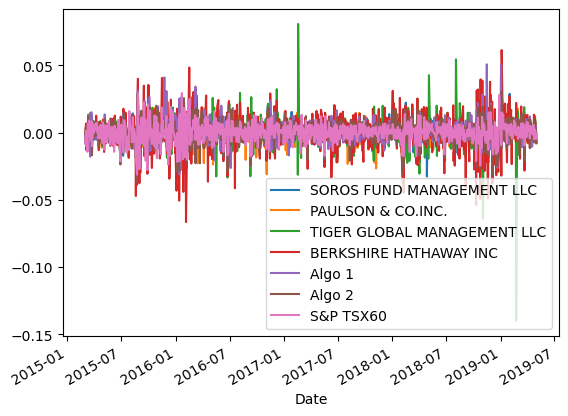

In [16]:
returns_all_df_con.plot()

In [20]:
returns_all_df_con.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [107]:
returns_all_df_con.shape

(1029, 7)

In [18]:
# Slice DataFrame into 2 year timeframe
daily_return_2_year = returns_all_df_con.loc["2015-03-30":"2017-12-31"]

<AxesSubplot:title={'center':'Daily Returns for 2 Years'}, xlabel='Date', ylabel='Return'>

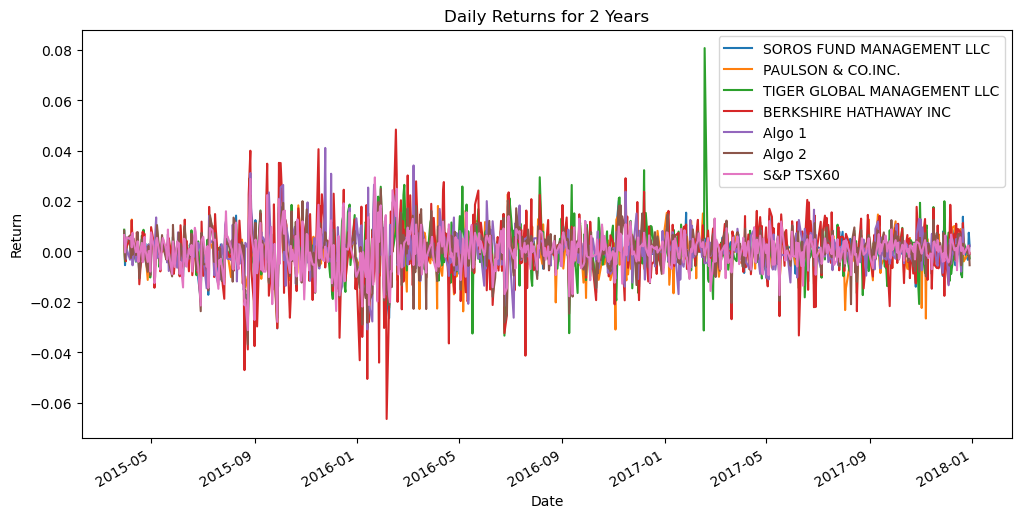

In [19]:
daily_return_2_year.plot(figsize=(12, 6), title='Daily Returns for 2 Years', xlabel='Date', ylabel='Return')

In [62]:
daily_return_n_year = returns_all_df_con.loc["2017-12-31":"2019-12-31"]

<AxesSubplot:title={'center':'Daily Returns for 2 Years'}, xlabel='Date', ylabel='Return'>

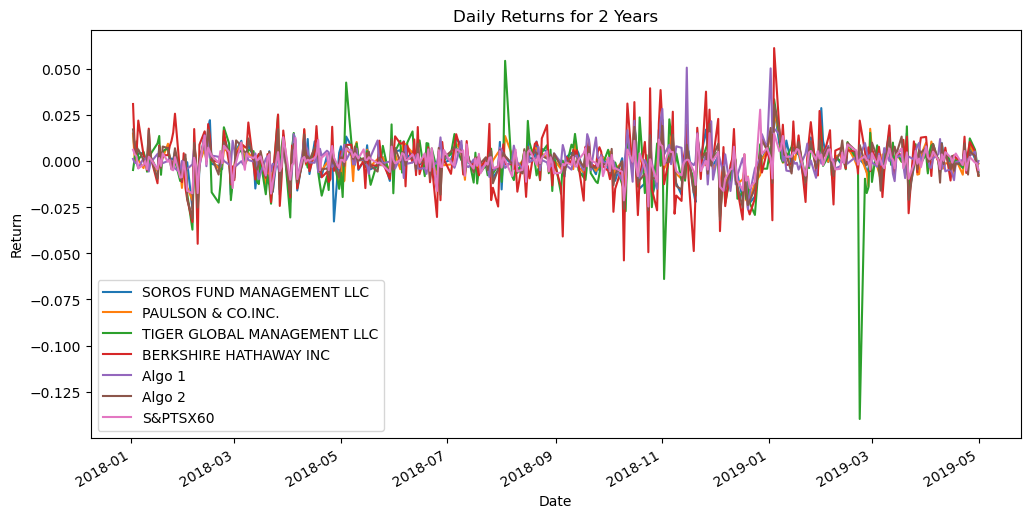

In [63]:
daily_return_n_year.plot(figsize=(12, 6), title='Daily Returns for 2 Years', xlabel='Date', ylabel='Return')

In [64]:
daily_return_one_year = returns_all_df_con.loc["2017-12-31":"2018-12-31"]

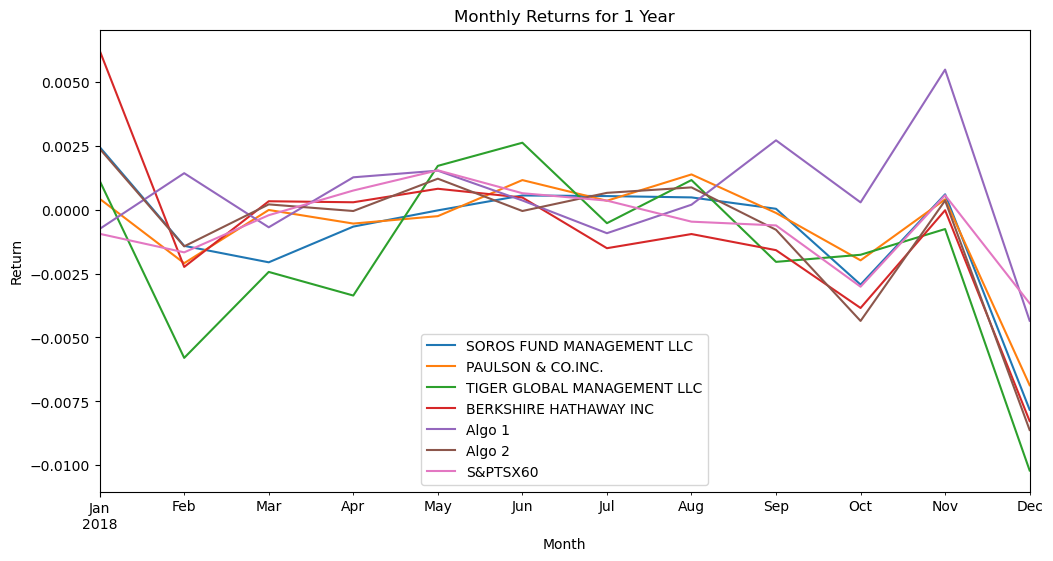

In [65]:
#In the code above, we are first resampling the daily returns at the monthly level using the resample() 
#method with a frequency of 'M' (month end frequency).We are then taking the mean of the daily returns for each month using the mean() method.
daily_return_one_year.resample('M').mean().plot(figsize=(12,6), title='Monthly Returns for 1 Year', xlabel='Month', ylabel='Return')
plt.show()

In [21]:
#Calculate cumulative returns of all portfolios
#cumulative return are important tool for evaluating portfolio performance, analyzing risk, tracking progress toward financial goals, 

cumulative_returns = (1 + returns_all_df_con).cumprod()
cumulative_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


In [ ]:
# Plot cumulative returns 
# as we can see here S&P TS60 have high cumulative returns where it could take higher risk then other portfoilios

<AxesSubplot:title={'center':'Cumulative Return'}, xlabel='Date', ylabel='Cumulative Return'>

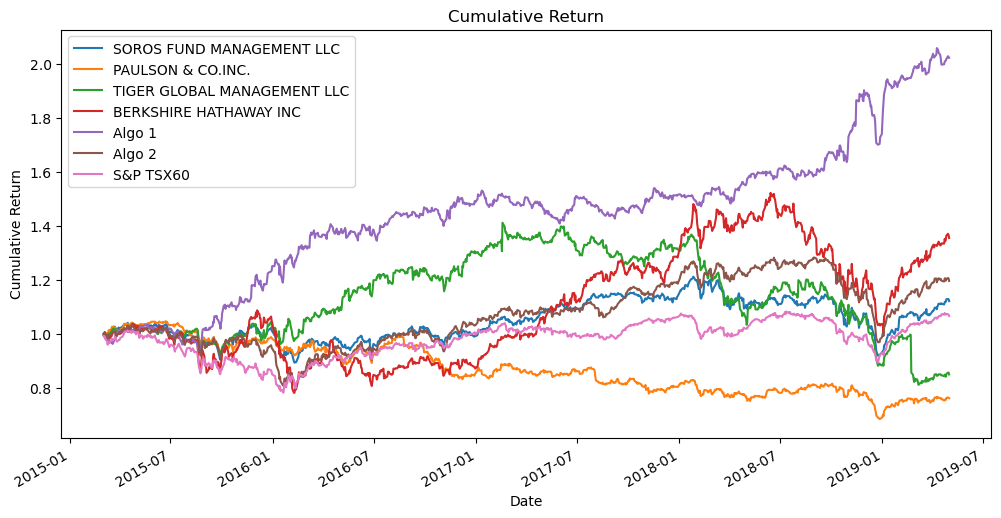

In [22]:
cumulative_returns.plot(figsize=(12, 6), title='Cumulative Return', xlabel='Date', ylabel='Cumulative Return')

In [ ]:
#Risk Analysis :

In [129]:
all_return_df.head()

,Algo 1,Algo 2,S&PTSX60,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.008530,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.008589,0.002416,-0.003371,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.000955,0.004323,0.001344,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.004957,-0.011460,-0.009972,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.005447,0.001303,-0.006555,0.000582,0.004225,0.005843,-0.001652


In [71]:
returns_all_df_con.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&PTSX60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [23]:
#sort the portfolio in aplhaptic order 
returns_all_df_con=returns_all_df_con.reindex(sorted(returns_all_df_con.columns), axis=1)

In [24]:
returns_all_df_con.head()

,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,S&P TSX60,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.006569,-0.004981,-0.008530,-0.001266,-0.000496
2015-03-04,-0.008589,0.002416,0.004213,0.003241,-0.003371,0.002230,-0.002534
2015-03-05,-0.000955,0.004323,0.006726,0.004076,0.001344,0.004016,0.002355
2015-03-06,-0.004957,-0.011460,-0.013098,-0.003574,-0.009972,-0.007905,-0.008481
2015-03-09,-0.005447,0.001303,-0.001652,0.004225,-0.006555,0.000582,0.005843


In [ ]:
#lets plot each protfolio :


In [79]:
#returns_all_df_con=returns_all_df_con.rename(columns={'algo 1':'algo_1','algo 2':'algo_2'})

In [81]:
returns_all_df_con.head()

,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,S&PTSX60,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.006569,-0.004981,-0.008530,-0.001266,-0.000496
2015-03-04,-0.008589,0.002416,0.004213,0.003241,-0.003371,0.002230,-0.002534
2015-03-05,-0.000955,0.004323,0.006726,0.004076,0.001344,0.004016,0.002355
2015-03-06,-0.004957,-0.011460,-0.013098,-0.003574,-0.009972,-0.007905,-0.008481
2015-03-09,-0.005447,0.001303,-0.001652,0.004225,-0.006555,0.000582,0.005843


In [25]:
algo_1 = returns_all_df_con["Algo 1"]

<AxesSubplot:title={'center':'Algo 1'}, xlabel='Date', ylabel='Cumulative Return'>

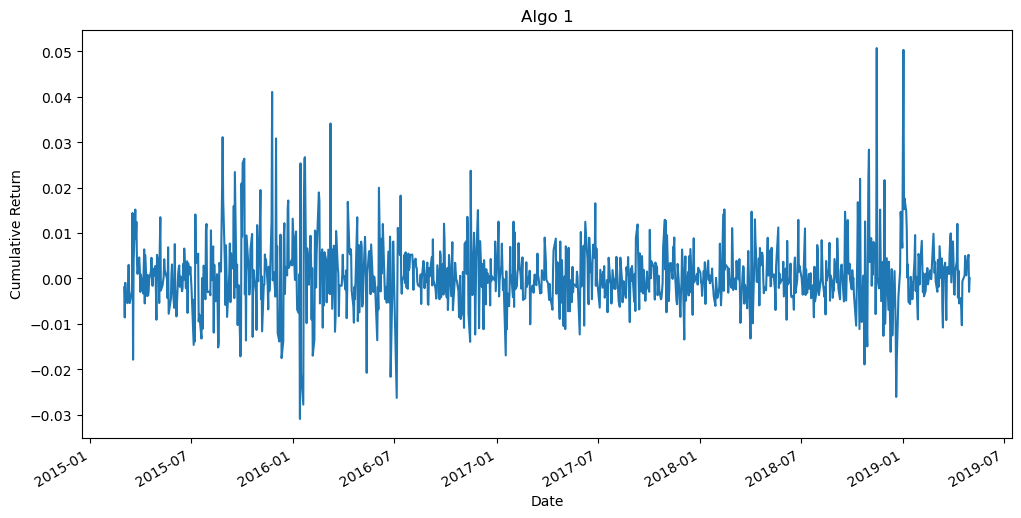

In [84]:
algo_1.plot(figsize=(12, 6), title='Algo 1 Return', xlabel='Date', ylabel='Return')

In [26]:
algo_2 = returns_all_df_con["Algo 2"]

<AxesSubplot:title={'center':'Algo 2 Return'}, xlabel='Date', ylabel='Return'>

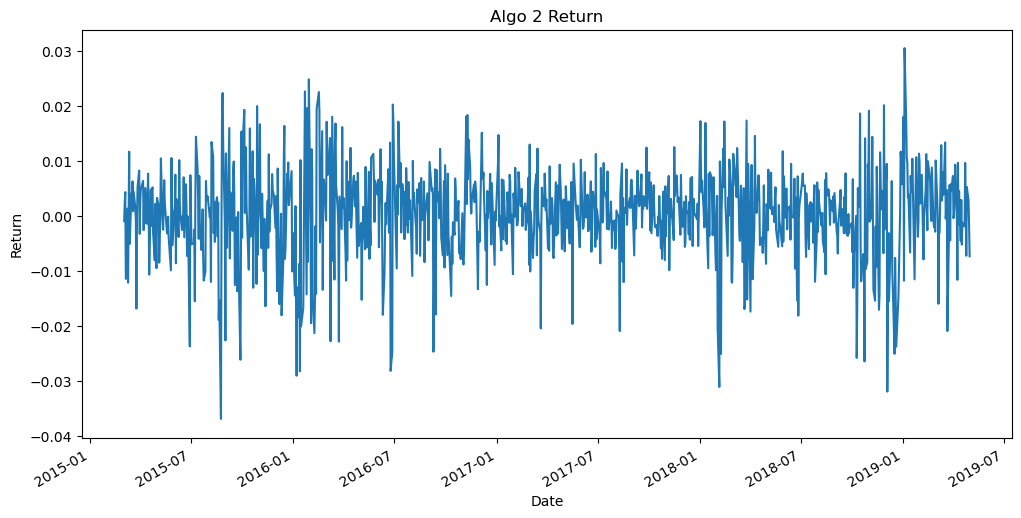

In [86]:
algo_2.plot(figsize=(12, 6), title='Algo 2 Return', xlabel='Date', ylabel='Return')

In [27]:
berakshire_hathway_inc=returns_all_df_con['BERKSHIRE HATHAWAY INC']

<AxesSubplot:title={'center':'ABERKSHIRE HATHAWAY INC Return'}, xlabel='Date', ylabel='Return'>

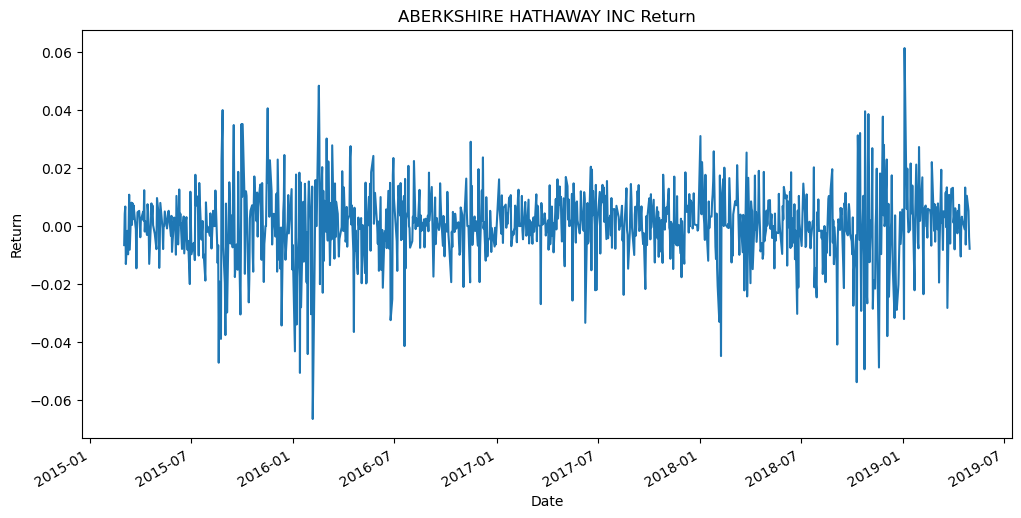

In [28]:
berakshire_hathway_inc.plot(figsize=(12, 6), title='ABERKSHIRE HATHAWAY INC Return', xlabel='Date', ylabel='Return')

In [29]:
returns_all_df_con.head()

,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,S&P TSX60,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.006569,-0.004981,-0.008530,-0.001266,-0.000496
2015-03-04,-0.008589,0.002416,0.004213,0.003241,-0.003371,0.002230,-0.002534
2015-03-05,-0.000955,0.004323,0.006726,0.004076,0.001344,0.004016,0.002355
2015-03-06,-0.004957,-0.011460,-0.013098,-0.003574,-0.009972,-0.007905,-0.008481
2015-03-09,-0.005447,0.001303,-0.001652,0.004225,-0.006555,0.000582,0.005843


In [30]:
paulsons_and_CO_inc=returns_all_df_con['PAULSON & CO.INC. ']

<AxesSubplot:title={'center':'PAULSON & CO.INC. Return'}, xlabel='Date', ylabel='Return'>

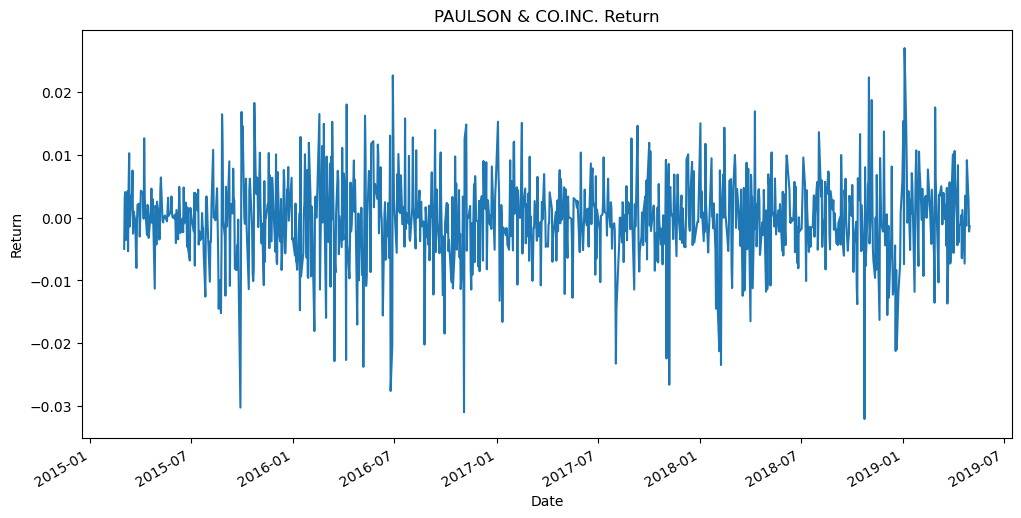

In [31]:
paulsons_and_CO_inc.plot(figsize=(12, 6), title='PAULSON & CO.INC. Return', xlabel='Date', ylabel='Return')

In [101]:
returns_all_df_con.head()

,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,S&PTSX60,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.006569,-0.004981,-0.008530,-0.001266,-0.000496
2015-03-04,-0.008589,0.002416,0.004213,0.003241,-0.003371,0.002230,-0.002534
2015-03-05,-0.000955,0.004323,0.006726,0.004076,0.001344,0.004016,0.002355
2015-03-06,-0.004957,-0.011460,-0.013098,-0.003574,-0.009972,-0.007905,-0.008481
2015-03-09,-0.005447,0.001303,-0.001652,0.004225,-0.006555,0.000582,0.005843


In [32]:
spts=returns_all_df_con['S&P TSX60']

<AxesSubplot:title={'center':'S&P TS X60 Return'}, xlabel='Date', ylabel='Return'>

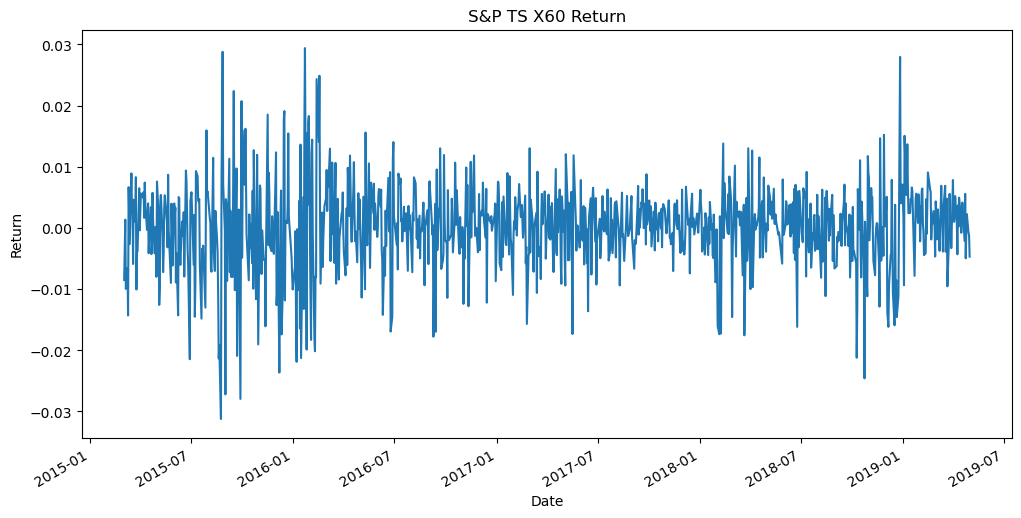

In [33]:
spts.plot(figsize=(12, 6), title='S&P TS X60 Return', xlabel='Date', ylabel='Return')

In [34]:
soros_llc  =returns_all_df_con['SOROS FUND MANAGEMENT LLC']

<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT LLC Return'}, xlabel='Date', ylabel='Return'>

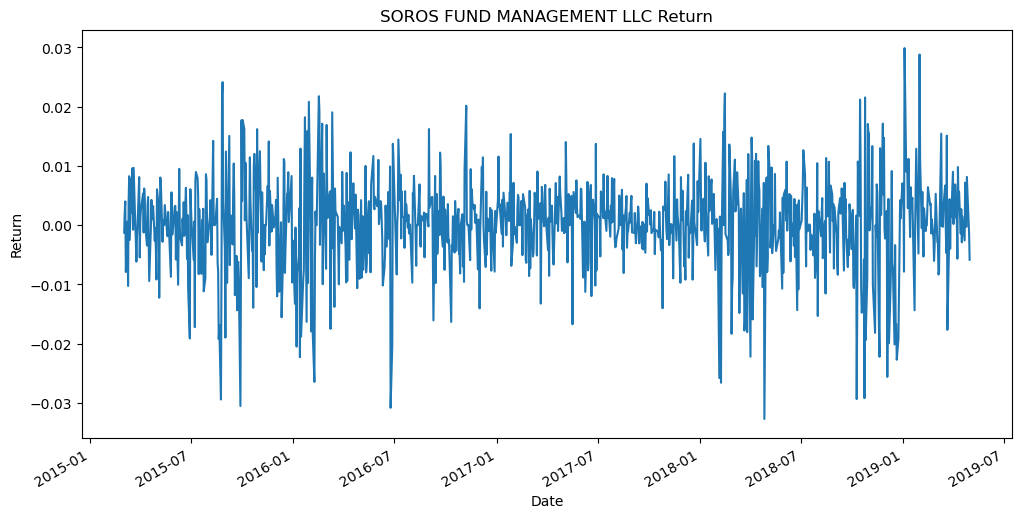

In [105]:
soros_llc.plot(figsize=(12, 6), title='SOROS FUND MANAGEMENT LLC Return', xlabel='Date', ylabel='Return')

In [35]:
tiger_llc= returns_all_df_con['TIGER GLOBAL MANAGEMENT LLC']

<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT LLC Return'}, xlabel='Date', ylabel='Return'>

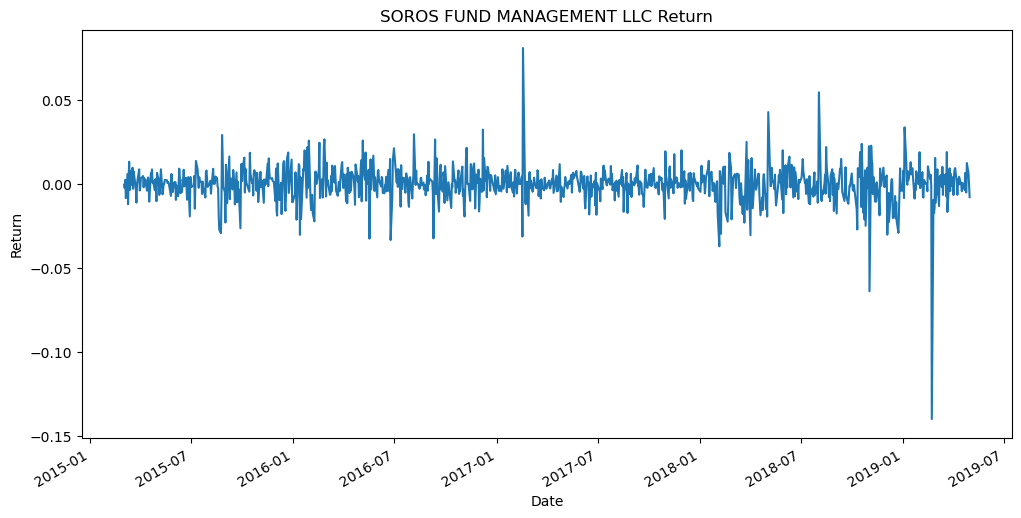

In [107]:
tiger_llc.plot(figsize=(12, 6), title='SOROS FUND MANAGEMENT LLC Return', xlabel='Date', ylabel='Return')

In [37]:
## Daily Standard Deviations
daily_std = returns_all_df_con.std()
daily_std.head()

Algo 1                    0.007589
Algo 2                    0.008326
BERKSHIRE HATHAWAY INC    0.012826
PAULSON & CO.INC.         0.006982
S&P TSX60                 0.007034
dtype: float64

In [24]:
returns_all_df_con.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,0.000141,-0.000241,-0.000099,0.000377,0.000713,0.000208,0.000087
std,0.007828,0.006982,0.010883,0.012826,0.007589,0.008326,0.007034
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.031241
25%,-0.003662,-0.004038,-0.004784,-0.005725,-0.003139,-0.003892,-0.003668
50%,0.000529,0.000000,0.000295,0.000635,0.000143,0.000629,0.000587
75%,0.004330,0.003621,0.005324,0.007516,0.004038,0.005256,0.004237
max,0.029881,0.027032,0.080705,0.061341,0.050735,0.030509,0.029389


In [38]:
# Identify the stock with the most riskA portfolio with a high standard deviation is considered riskier than a 
#portfolio with a lower standard deviation
#A portfolio with a higher standard deviation may have a higher potential for returns,
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX60                      0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [114]:
daily_std.dtypes

dtype('float64')

In [115]:
type(daily_std)

pandas.core.series.Series

In [39]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = spts.std()



In [40]:
daily_std.describe()

count    7.000000
mean     0.008781
std      0.002221
min      0.006982
25%      0.007312
50%      0.007828
75%      0.009605
max      0.012826
dtype: float64

In [118]:
sp_tsx_std

0.007034167748577725

In [37]:
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX60                      0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [42]:
## Determine which portfolios are riskier than the S&P TSX 60
risk_lst=[]
total =daily_std.sum()
for x , val in  daily_std.items():
    if val > sp_tsx_std:
        percentage= (val/total) *100
        risk_lst.append((x , percentage))
        print((f'{x} is {percentage:.2f}% Higher risk Than S&P TSX 60  '))
else:
    print((f'{x} is {percentage:.2f} % Less Risk Than S&P TSX 60'))

BERKSHIRE HATHAWAY INC is 20.87% Higher risk Than S&P TSX 60  
TIGER GLOBAL MANAGEMENT LLC is 17.70% Higher risk Than S&P TSX 60  
Algo 2 is 13.55% Higher risk Than S&P TSX 60  
SOROS FUND MANAGEMENT LLC is 12.73% Higher risk Than S&P TSX 60  
Algo 1 is 12.35% Higher risk Than S&P TSX 60  
PAULSON & CO.INC.  is 12.35 % Less Risk Than S&P TSX 60


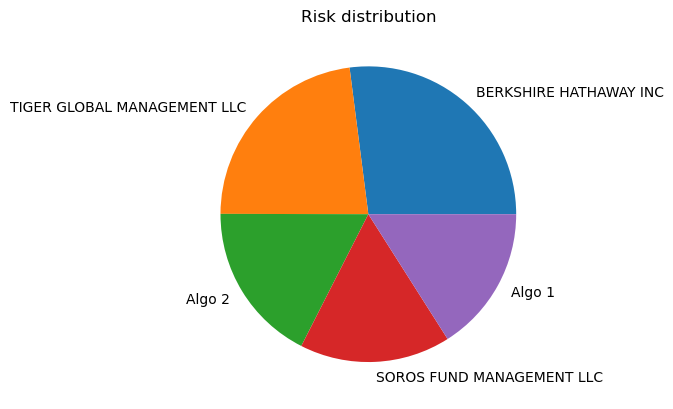

In [43]:
labels = [item[0] for item in risk_lst]
values = [item[1] for item in risk_lst]

plt.pie(values, labels=labels)
plt.title('Risk distribution Agenest')
plt.show()


In [44]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
dtype: float64

In [ ]:
#Rolling Statistics

#Risk changes over time. Analyze the rolling statistics for Risk and Beta.

#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
#Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.

#Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

In [45]:
#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
rolling_all_21=returns_all_df_con.rolling(window=21).std()


<AxesSubplot:title={'center':'Rolling standard deviation for all portfolios using a 21-day window'}, xlabel='Date', ylabel='Return'>

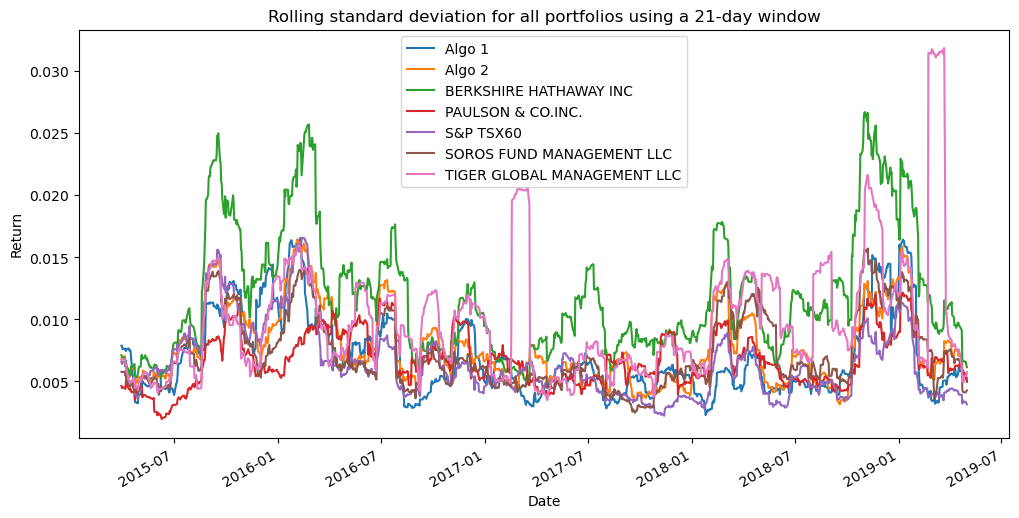

In [46]:
rolling_all_21.plot(figsize=(12, 6), title='Rolling standard deviation for all portfolios using a 21-day window', xlabel='Date', ylabel='Return')

In [47]:
#Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
returns_all_df_corr=returns_all_df_con.corr()


In [142]:
returns_all_df_corr.head()

,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,S&PTSX60,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC
Algo 1,1.000000,0.285455,0.289378,0.266363,0.310276,0.313795,0.161236
Algo 2,0.285455,1.000000,0.684609,0.674015,0.737370,0.826667,0.506689
BERKSHIRE HATHAWAY INC,0.289378,0.684609,1.000000,0.540033,0.557250,0.750181,0.423524
PAULSON & CO.INC.,0.266363,0.674015,0.540033,1.000000,0.486511,0.697076,0.433034
S&PTSX60,0.310276,0.737370,0.557250,0.486511,1.000000,0.673930,0.440583


<AxesSubplot:>

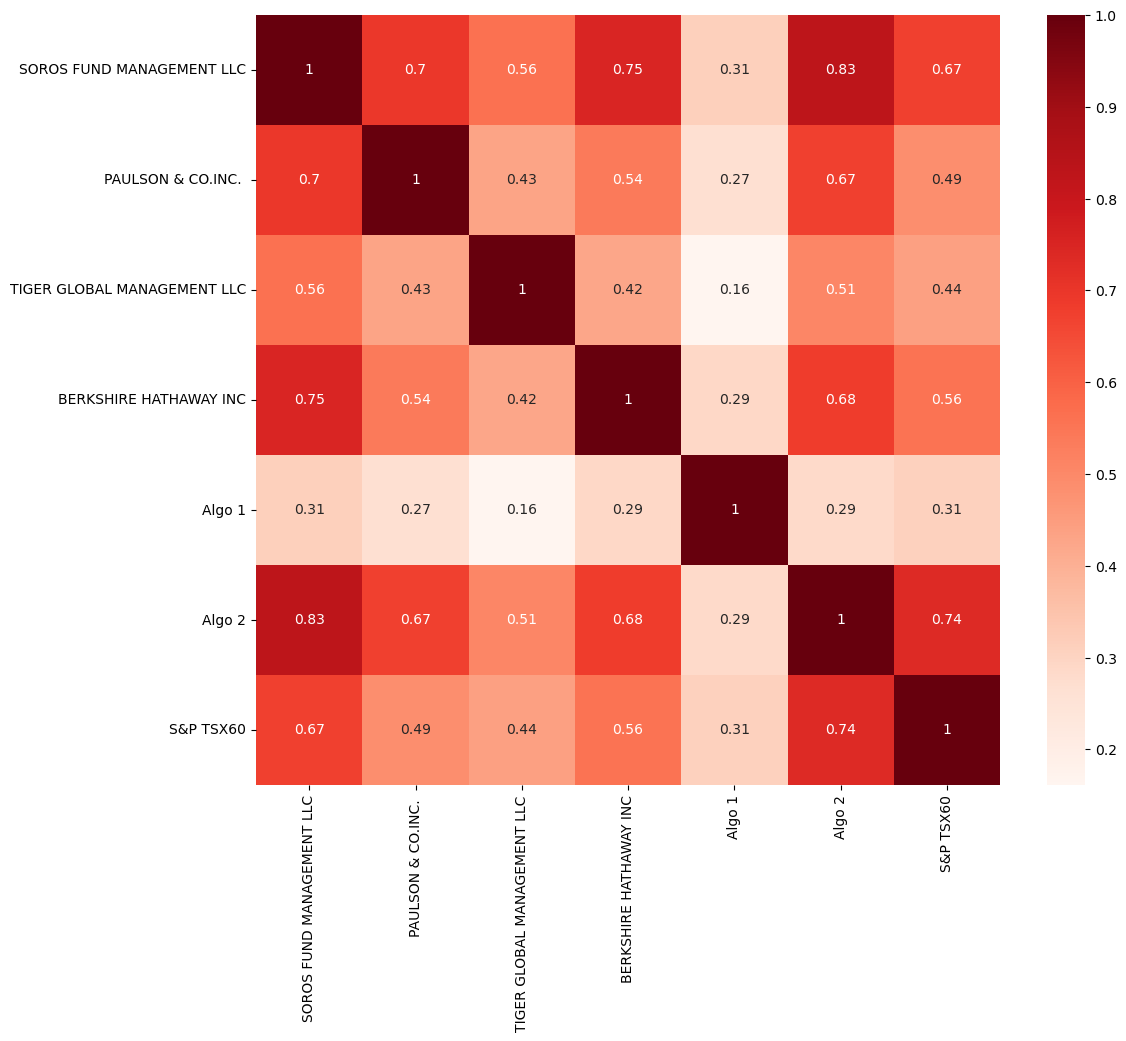

In [56]:
#Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
#from the heatmap above algo 2  and s&p are postivelley corrlated 0.74
plt.figure(figsize=(12,10))
sns.heatmap(returns_all_df_corr, annot=True, cmap=plt.cm.Reds)

In [ ]:
#Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
#from the heatmap above algo 2  and s&p are postivelley corrlated 0.74

<AxesSubplot:title={'center':'Rolling 60-Day Covariance BERKSHIRE HATHAWAY INC Returns vs. S&P 500 Returns'}, xlabel='Date'>

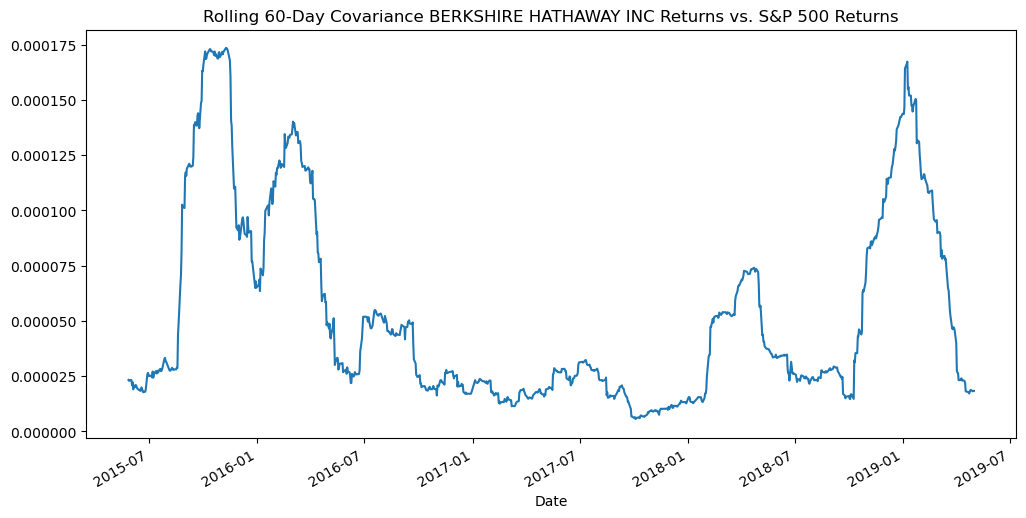

In [54]:
#Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P T
berkshire_sp_cov= returns_all_df_con['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(returns_all_df_con['S&P TSX60'])

berkshire_sp_cov.plot(figsize=(12, 6), title='Rolling 60-Day Covariance BERKSHIRE HATHAWAY INC Returns vs. S&P TSX60 Returns')

In [60]:

#Calculate covariance of all daily returns of Algo 2 vs. &PTSX60
berkshire_covariance =returns_all_df_con['BERKSHIRE HATHAWAY INC'].cov(returns_all_df_con['S&P TSX60'])
berkshire_covariance 
                                                                 

5.027336077110013e-05

In [64]:
#calculate variance for S&PTS portfolio
s_and_p_variance =returns_all_df_con['S&P TSX60'].var()
s_and_p_variance

4.9479515915131015e-05

In [65]:
 #Calculate covariance of all daily returns of Brekshire 2 vs. S&PTSX60
s_and_p_beta  = berkshire_covariance  / s_and_p_variance

In [66]:
s_and_p_beta

1.0160439091063613

In [ ]:
 #Use `ewm` to calculate the rolling window
    #DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, 
                 # ignore_na=False, axis=0, times=None, method='single')[source]


In [ ]:
#An alternative way to calculate a rolling window is to take the exponentially weighted moving average. 
#This is like a moving window average, but it assigns greater importance to more recent observations. 
#Try calculating the ewm with a 21-day half life for each portfolio, using standard deviation (std) as 
#the metric of interest.

In [67]:
returns_all_df_con.head()


,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,S&P TSX60,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.006569,-0.004981,-0.008530,-0.001266,-0.000496
2015-03-04,-0.008589,0.002416,0.004213,0.003241,-0.003371,0.002230,-0.002534
2015-03-05,-0.000955,0.004323,0.006726,0.004076,0.001344,0.004016,0.002355
2015-03-06,-0.004957,-0.011460,-0.013098,-0.003574,-0.009972,-0.007905,-0.008481
2015-03-09,-0.005447,0.001303,-0.001652,0.004225,-0.006555,0.000582,0.005843


In [76]:
algo1_std_ewm = returns_all_df_con['Algo 1'].ewm(halflife=21).std()
algo2_std_ewm = returns_all_df_con['Algo 2'].ewm(halflife=21).std()
brekshire_std_ewm = returns_all_df_con['BERKSHIRE HATHAWAY INC'].ewm(halflife=21).std()
paul_std_ewm= returns_all_df_con['PAULSON & CO.INC. '].ewm(halflife=21).std()
spx_std_ewm = returns_all_df_con['S&P TSX60'].ewm(halflife=21).std()
soros_std_ewm = returns_all_df_con['SOROS FUND MANAGEMENT LLC'].ewm(halflife=21).std()
tigier_std_ewm = returns_all_df_con['TIGER GLOBAL MANAGEMENT LLC'].ewm(halflife=21).std()


Text(0.5, 1.0, 'Exponentially Weighted Moving Average with 21-Day Half-Life and Standard Deviation')

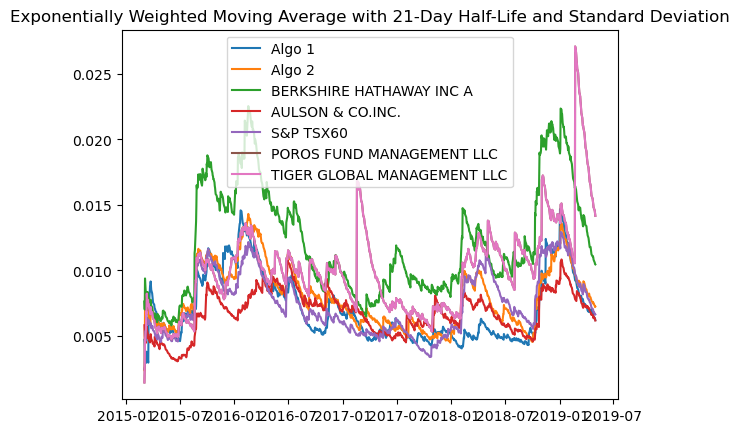

In [78]:
#plot  the moving average of 21 days life time for all portfolios
plt.plot(algo1_std_ewm, label='Algo 1')
plt.plot(algo2_std_ewm, label='Algo 2')
plt.plot(brekshire_std_ewm, label='BERKSHIRE HATHAWAY INC A')
plt.plot(paul_std_ewm, label='AULSON & CO.INC.')
plt.plot(soros_std_ewm, label='S&P TSX60')
plt.plot(tigier_std_ewm, label='POROS FUND MANAGEMENT LLC')
plt.plot(tigier_std_ewm, label='TIGER GLOBAL MANAGEMENT LLC')

plt.legend()
plt.title('Exponentially Weighted Moving Average with 21-Day Half-Life and Standard Deviation')

In [ ]:
#Sharpe Ratios
# Annualized Sharpe Ratios



## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [ ]:
# Reading algorithmic returns



In [ ]:
# Count nulls


In [ ]:
# Drop nulls


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [ ]:
# Reading S&P TSX 60 Closing Prices


In [ ]:
# Check Data Types


In [ ]:
# Fix Data Types


In [ ]:
# Calculate Daily Returns


In [ ]:
# Drop nulls


In [ ]:
# Rename `Close` Column to be specific to this portfolio.


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [ ]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [ ]:
# Plot daily returns of all portfolios


#### Calculate and Plot cumulative returns.

In [ ]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [ ]:
# Box plot to visually show risk


### Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of all portfolios


### Determine which portfolios are riskier than the S&P TSX 60

In [ ]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60


### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!